## Project 2020 : Machine Learning and Statistics

### A web service that uses machine learning to make predictions based on the data set powerproduction 
***
Project requirements:

Create a web service that uses machine learning to make predictions based on the data set powerproduction. The goal is;

- Produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set with analysis of its accuracy.

- Develop a web service that will respond with predicted power values based on speed values sent as HTTP requests:
    1. Python script that runs a web service based on the model.
    2. Dockerfile to build and run the web service in a container.
    
Methodology:
- Importing the data set

- Explore the data set
- Cleanse the data set
- Perform Analysis

In [1]:
# %matplotlib notebook

%matplotlib inline

# importing required packages and libraries
# Numerical arrays
import numpy as np
rng = np.random.default_rng()

# Data frames
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Neural networks
import tensorflow as tf
import tensorflow.keras as kr
from tensorflow.keras import layers


In [2]:
# Plot style
plt.style.use("ggplot")

# Plot size
plt.rcParams["figure.figsize"] = [12, 8]

#### Importing and exploring the data set

In [3]:
# importing the data set
url = "https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv"
df = pd.read_csv(url, error_bad_lines=True)
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


<AxesSubplot:xlabel='speed', ylabel='power'>

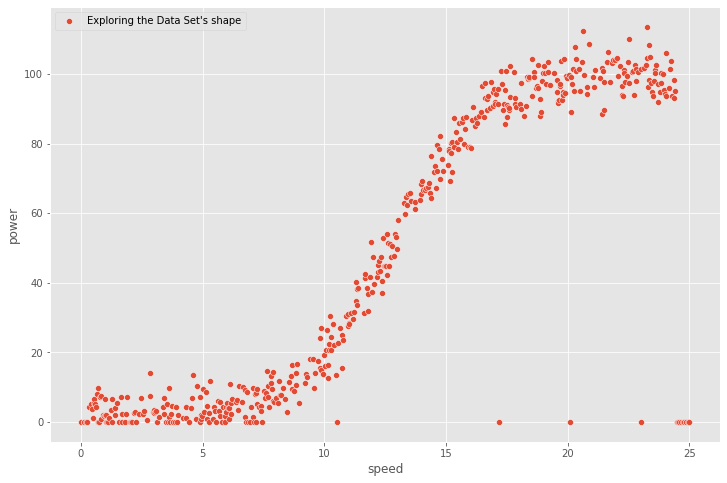

In [4]:
# Plotting the data set to explore the shape
sns.scatterplot(data = df, x = "speed", y = "power", label = "Exploring the Data Set's shape")

### Prepare the data set

#### We observe that many values for the power variable are of 0 value, this can be referred to many factors as for example but not limited to;

- Human error during the collection of data
- Technical error during exporting of data
- Technical error which can be related to the methodology of reporting
- Actual reporting parameters related to the actual infrastrucure and technical model settings.

#### Since the scope is to implement an accurate linear regression with diregard to the condition around the 0 values, The 0 values will be eliminated

In [5]:
# removing the o values from the data set.
df = df[df != 0].dropna()
df

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [6]:
# transpose the data set
df.transpose()

,5,6,7,8,9,10,11,12,13,14,...,480,481,482,483,484,485,486,487,488,489
speed,0.325,0.400,0.450,0.501,0.526,0.551,0.576,0.626,0.676,0.701,...,23.974,24.024,24.049,24.174,24.199,24.249,24.299,24.349,24.374,24.399
power,4.331,5.186,3.826,1.048,5.553,6.498,5.241,4.220,7.974,9.746,...,94.270,105.992,93.524,95.869,101.419,103.700,93.694,93.078,98.223,95.117


In [7]:
# validating the data set
df.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


<AxesSubplot:xlabel='speed', ylabel='power'>

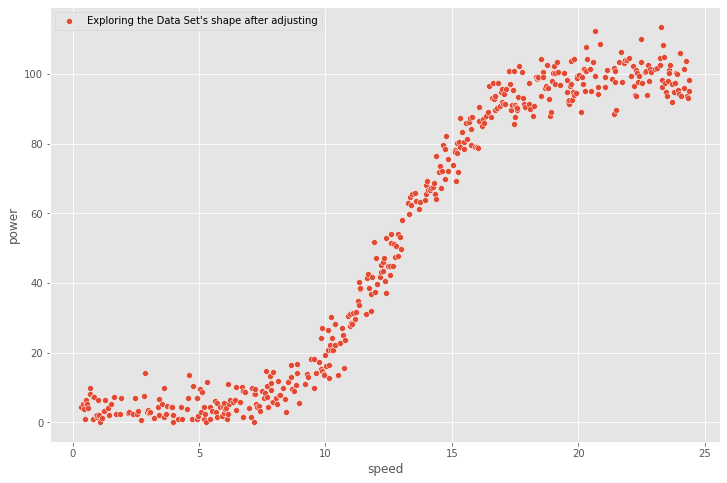

In [8]:
sns.scatterplot(data = df, x = "speed", y = "power", label = "Exploring the Data Set's shape after adjusting")

<br>

***

## ANALYSIS

***

In [9]:
# retrieve the array
data= df.values
data

array([[3.25000e-01, 4.33100e+00],
       [4.00000e-01, 5.18600e+00],
       [4.50000e-01, 3.82600e+00],
       [5.01000e-01, 1.04800e+00],
       [5.26000e-01, 5.55300e+00],
       [5.51000e-01, 6.49800e+00],
       [5.76000e-01, 5.24100e+00],
       [6.26000e-01, 4.22000e+00],
       [6.76000e-01, 7.97400e+00],
       [7.01000e-01, 9.74600e+00],
       [8.01000e-01, 7.27100e+00],
       [8.26000e-01, 7.95000e-01],
       [8.51000e-01, 7.35000e+00],
       [9.26000e-01, 1.99600e+00],
       [9.51000e-01, 1.60900e+00],
       [9.76000e-01, 2.06400e+00],
       [1.00100e+00, 6.51100e+00],
       [1.05100e+00, 2.08500e+00],
       [1.10100e+00, 1.21000e-01],
       [1.15100e+00, 1.20800e+00],
       [1.25100e+00, 3.37300e+00],
       [1.27600e+00, 6.51000e+00],
       [1.40100e+00, 4.15600e+00],
       [1.42600e+00, 2.00500e+00],
       [1.50200e+00, 5.35200e+00],
       [1.65200e+00, 7.22100e+00],
       [1.70200e+00, 2.43900e+00],
       [1.87700e+00, 2.35900e+00],
       [1.90200e+00,

In [10]:
# split into input and output elements.
x, y = data[:, :-1], data[:, -1]

### Splitting the data set for _train_ and _test_

In [11]:
# Splitting the data set into train and test.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
print(x_train.shape); print(x_test.shape)

(302, 1)
(149, 1)


### Creating the neural network

Creating a neural network with 3 sequential layers;

dense (Dense) (200)     
______________________
dense_1 (Dense) (150)        
______________________
dense_2 (Dense) (1)

In [12]:
# Create a neural network with neurons.
model = kr.models.Sequential()

model.add(kr.layers.Dense(200, input_shape = (1,), activation = "relu", kernel_initializer = "VarianceScaling", bias_initializer = "VarianceScaling"))
model.add(kr.layers.Dense(150, input_shape = (1,), activation = "sigmoid", kernel_initializer = "glorot_uniform", bias_initializer = "glorot_uniform"))
model.add(kr.layers.Dense(1, activation ="linear", kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
# Compile the model
model.compile(kr.optimizers.Adam(lr=0.002), loss = "mean_squared_error", metrics=["accuracy"], run_eagerly=True)

In [13]:
# Train the neural network on training data.
# We pass epochs=500 and in 70 batches.
model.fit(x_train, y_train, epochs = 500, batch_size = 70)

Epoch 1/500
5/5 [==============================] - 0s 9ms/step - loss: 4404.1719 - accuracy: 0.0000e+00
Epoch 2/500
5/5 [==============================] - 0s 9ms/step - loss: 3963.5874 - accuracy: 0.0000e+00
Epoch 3/500
5/5 [==============================] - 0s 10ms/step - loss: 3727.6060 - accuracy: 0.0000e+00
Epoch 4/500
5/5 [==============================] - 0s 9ms/step - loss: 3635.5020 - accuracy: 0.0000e+00
Epoch 5/500
5/5 [==============================] - 0s 9ms/step - loss: 3569.6233 - accuracy: 0.0000e+00
Epoch 6/500
5/5 [==============================] - 0s 9ms/step - loss: 3506.5728 - accuracy: 0.0000e+00
Epoch 7/500
5/5 [==============================] - 0s 11ms/step - loss: 3445.0601 - accuracy: 0.0000e+00
Epoch 8/500
5/5 [==============================] - 0s 10ms/step - loss: 3386.1255 - accuracy: 0.0000e+00
Epoch 9/500
5/5 [==============================] - 0s 9ms/step - loss: 3326.8967 - accuracy: 0.0000e+00
Epoch 10/500
5/5 [==============================] - 0s 10ms/s

Epoch 79/500
5/5 [==============================] - 0s 8ms/step - loss: 905.0718 - accuracy: 0.0000e+00
Epoch 80/500
5/5 [==============================] - 0s 8ms/step - loss: 883.2786 - accuracy: 0.0000e+00
Epoch 81/500
5/5 [==============================] - 0s 8ms/step - loss: 865.4354 - accuracy: 0.0000e+00
Epoch 82/500
5/5 [==============================] - 0s 7ms/step - loss: 845.8214 - accuracy: 0.0000e+00
Epoch 83/500
5/5 [==============================] - 0s 8ms/step - loss: 832.3657 - accuracy: 0.0000e+00
Epoch 84/500
5/5 [==============================] - 0s 8ms/step - loss: 812.2367 - accuracy: 0.0000e+00
Epoch 85/500
5/5 [==============================] - 0s 8ms/step - loss: 792.0895 - accuracy: 0.0000e+00
Epoch 86/500
5/5 [==============================] - 0s 8ms/step - loss: 775.4271 - accuracy: 0.0000e+00
Epoch 87/500
5/5 [==============================] - 0s 8ms/step - loss: 758.8021 - accuracy: 0.0000e+00
Epoch 88/500
5/5 [==============================] - 0s 8ms/step 

5/5 [==============================] - 0s 8ms/step - loss: 147.7971 - accuracy: 0.0000e+00
Epoch 158/500
5/5 [==============================] - 0s 8ms/step - loss: 143.9761 - accuracy: 0.0000e+00
Epoch 159/500
5/5 [==============================] - 0s 8ms/step - loss: 145.2671 - accuracy: 0.0000e+00
Epoch 160/500
5/5 [==============================] - 0s 8ms/step - loss: 138.8799 - accuracy: 0.0000e+00
Epoch 161/500
5/5 [==============================] - 0s 8ms/step - loss: 135.5461 - accuracy: 0.0000e+00
Epoch 162/500
5/5 [==============================] - 0s 8ms/step - loss: 131.9589 - accuracy: 0.0000e+00
Epoch 163/500
5/5 [==============================] - 0s 8ms/step - loss: 128.3786 - accuracy: 0.0000e+00
Epoch 164/500
5/5 [==============================] - 0s 8ms/step - loss: 125.1360 - accuracy: 0.0000e+00
Epoch 165/500
5/5 [==============================] - 0s 8ms/step - loss: 122.3887 - accuracy: 0.0000e+00
Epoch 166/500
5/5 [==============================] - 0s 8ms/step - lo

5/5 [==============================] - 0s 7ms/step - loss: 40.3720 - accuracy: 0.0000e+00
Epoch 236/500
5/5 [==============================] - 0s 8ms/step - loss: 37.9507 - accuracy: 0.0000e+00
Epoch 237/500
5/5 [==============================] - 0s 8ms/step - loss: 34.9589 - accuracy: 0.0000e+00
Epoch 238/500
5/5 [==============================] - 0s 8ms/step - loss: 32.2287 - accuracy: 0.0000e+00
Epoch 239/500
5/5 [==============================] - 0s 8ms/step - loss: 31.7776 - accuracy: 0.0000e+00
Epoch 240/500
5/5 [==============================] - 0s 8ms/step - loss: 32.7131 - accuracy: 0.0000e+00
Epoch 241/500
5/5 [==============================] - 0s 8ms/step - loss: 37.4005 - accuracy: 0.0000e+00
Epoch 242/500
5/5 [==============================] - 0s 8ms/step - loss: 45.9719 - accuracy: 0.0000e+00
Epoch 243/500
5/5 [==============================] - 0s 8ms/step - loss: 35.6740 - accuracy: 0.0000e+00
Epoch 244/500
5/5 [==============================] - 0s 8ms/step - loss: 33.89

5/5 [==============================] - 0s 8ms/step - loss: 21.5678 - accuracy: 0.0000e+00
Epoch 314/500
5/5 [==============================] - 0s 8ms/step - loss: 24.7425 - accuracy: 0.0000e+00
Epoch 315/500
5/5 [==============================] - 0s 8ms/step - loss: 28.5754 - accuracy: 0.0000e+00
Epoch 316/500
5/5 [==============================] - 0s 8ms/step - loss: 26.6053 - accuracy: 0.0000e+00
Epoch 317/500
5/5 [==============================] - 0s 8ms/step - loss: 23.4752 - accuracy: 0.0000e+00
Epoch 318/500
5/5 [==============================] - 0s 9ms/step - loss: 35.4818 - accuracy: 0.0000e+00
Epoch 319/500
5/5 [==============================] - 0s 8ms/step - loss: 37.6393 - accuracy: 0.0000e+00
Epoch 320/500
5/5 [==============================] - 0s 7ms/step - loss: 34.8048 - accuracy: 0.0000e+00
Epoch 321/500
5/5 [==============================] - 0s 9ms/step - loss: 32.7038 - accuracy: 0.0000e+00
Epoch 322/500
5/5 [==============================] - 0s 8ms/step - loss: 29.27

5/5 [==============================] - 0s 8ms/step - loss: 23.7872 - accuracy: 0.0000e+00
Epoch 392/500
5/5 [==============================] - 0s 10ms/step - loss: 21.4558 - accuracy: 0.0000e+00
Epoch 393/500
5/5 [==============================] - 0s 7ms/step - loss: 20.9859 - accuracy: 0.0000e+00
Epoch 394/500
5/5 [==============================] - 0s 8ms/step - loss: 21.2292 - accuracy: 0.0000e+00
Epoch 395/500
5/5 [==============================] - 0s 8ms/step - loss: 21.0208 - accuracy: 0.0000e+00
Epoch 396/500
5/5 [==============================] - 0s 8ms/step - loss: 23.8585 - accuracy: 0.0000e+00
Epoch 397/500
5/5 [==============================] - 0s 8ms/step - loss: 22.0975 - accuracy: 0.0000e+00
Epoch 398/500
5/5 [==============================] - 0s 8ms/step - loss: 19.6736 - accuracy: 0.0000e+00
Epoch 399/500
5/5 [==============================] - 0s 9ms/step - loss: 22.0717 - accuracy: 0.0000e+00
Epoch 400/500
5/5 [==============================] - 0s 8ms/step - loss: 20.7

5/5 [==============================] - 0s 8ms/step - loss: 19.0167 - accuracy: 0.0000e+00
Epoch 470/500
5/5 [==============================] - 0s 8ms/step - loss: 20.8717 - accuracy: 0.0000e+00
Epoch 471/500
5/5 [==============================] - 0s 7ms/step - loss: 21.3414 - accuracy: 0.0000e+00
Epoch 472/500
5/5 [==============================] - 0s 8ms/step - loss: 21.4438 - accuracy: 0.0000e+00
Epoch 473/500
5/5 [==============================] - 0s 9ms/step - loss: 21.2189 - accuracy: 0.0000e+00
Epoch 474/500
5/5 [==============================] - 0s 8ms/step - loss: 19.7892 - accuracy: 0.0000e+00
Epoch 475/500
5/5 [==============================] - 0s 8ms/step - loss: 20.8905 - accuracy: 0.0000e+00
Epoch 476/500
5/5 [==============================] - 0s 8ms/step - loss: 21.5097 - accuracy: 0.0000e+00
Epoch 477/500
5/5 [==============================] - 0s 9ms/step - loss: 20.4262 - accuracy: 0.0000e+00
Epoch 478/500
5/5 [==============================] - 0s 9ms/step - loss: 26.71

#### Accuracy

In [14]:
# See the accuracy.
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 11ms/step - loss: 19.2208 - accuracy: 0.0000e+00


[19.220766067504883, 0.0]

In [15]:
model.predict([15.000])

array([[80.06933]], dtype=float32)

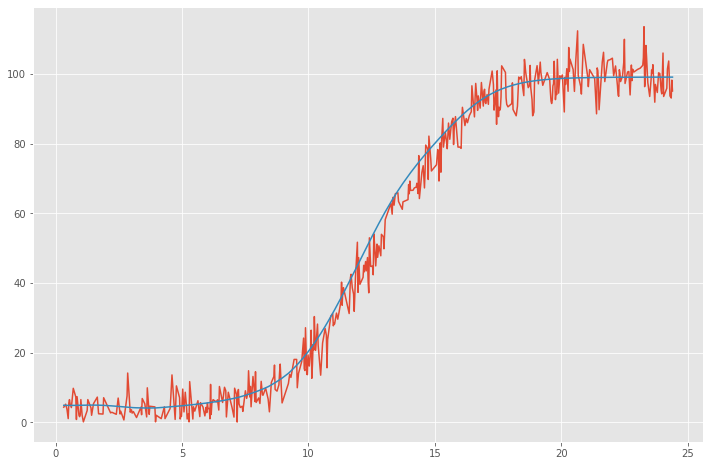

In [16]:
plt.plot(x, y)
plt.plot(x, model.predict(x))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 151       
Total params: 30,701
Trainable params: 30,701
Non-trainable params: 0
_________________________________________________________________


In [18]:
# creating the function

def keras(x):
    return model.predict([x])

In [19]:
# example
keras(5.100)

array([[4.803155]], dtype=float32)

In [20]:
# flask for web app.
import flask as fl

In [21]:
# create a new web app.
app = fl.Flask(__name__)

In [22]:
# Add root route.
@app.route("/")
def home():
    return app.send_static_file("index.html")


In [24]:
# Add keras route.
@app.route("/api/keras")
def keras():
    return model.predict([x])

In [ ]:
# Add sklearn route.
@app.route("/api/sklearn")
def sklearn():
    return {"value": }

## References

[1] https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

[2] https://towardsdatascience.com/demystifying-optimizations-for-machine-learning-c6c6405d3eea

[3] MEDIUM ; Polynomial Regression using tf.keras : https://medium.com/@anigasan637/polynomial-regression-using-tf-keras-17eaac771256

[4] Tensorflow ; Basic regression : https://www.tensorflow.org/tutorials/keras/regression

[5] PLURALSIGHT ; Regression with Keras : https://www.pluralsight.com/guides/regression-keras

[6] TYLANBIL : https://taylanbil.github.io/polysolver

[7]  MEDIUM ; Polynomial Regression with Keras : https://medium.com/analytics-vidhya/polynomial-regression-with-keras-ef1797b39b88

[8] Towards Data Science ; Regression-based neural networks : https://towardsdatascience.com/regression-based-neural-networks-with-tensorflow-v2-0-predicting-average-daily-rates-e20fffa7ac9a

[9] Machine Leasrning Mastery ; Regression Tutorial with the Keras Deep Learning Library in Python : https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

[10] Ritchie Ng ; Polynomial Regression : https://www.ritchieng.com/machine-learning-polynomial-regression/

[11] Keras ; Introduction to Keras for Engineers : https://keras.io/getting_started/intro_to_keras_for_engineers/

## End